# Classification multi-classe 
Nous allons comparer 4 algorthimes en effectuant une classifcation sur le dataset Wine. 
algorithmes utilisé :
* Régression logistique
* Arbre de decision
* Random Forest
* k-neighbor classification
## Imports

In [3]:
#manipulation de données
import pandas as pd
import numpy as np
#visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#outils ML 
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modèle ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Métriques d'évaluations
from sklearn.metrics import (confusion_matrix, classification_report)

#ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

## Chargement et préparation des données 

In [4]:
# Chargement du dataset Iris (150 échantillons, 4 features, 3 classes)
bunch = load_wine()

# Création d'un DataFrame pour les features
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)

# Création d'une Series pour la target
# Conversion des valeurs numériques (1, 2, 3) en noms d'espèces
y = pd.Series(bunch.target, name='wine_class').map(dict(enumerate(bunch.target_names)))

# Fusion des features et de la target dans un seul DataFrame
df = pd.concat([X, y], axis=1)

# Stockage des noms des features et des classes
target_names = bunch.target_names

In [5]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Exploration des données

In [6]:
# afficher les 5 premières lignes du dataset 
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


<Axes: >

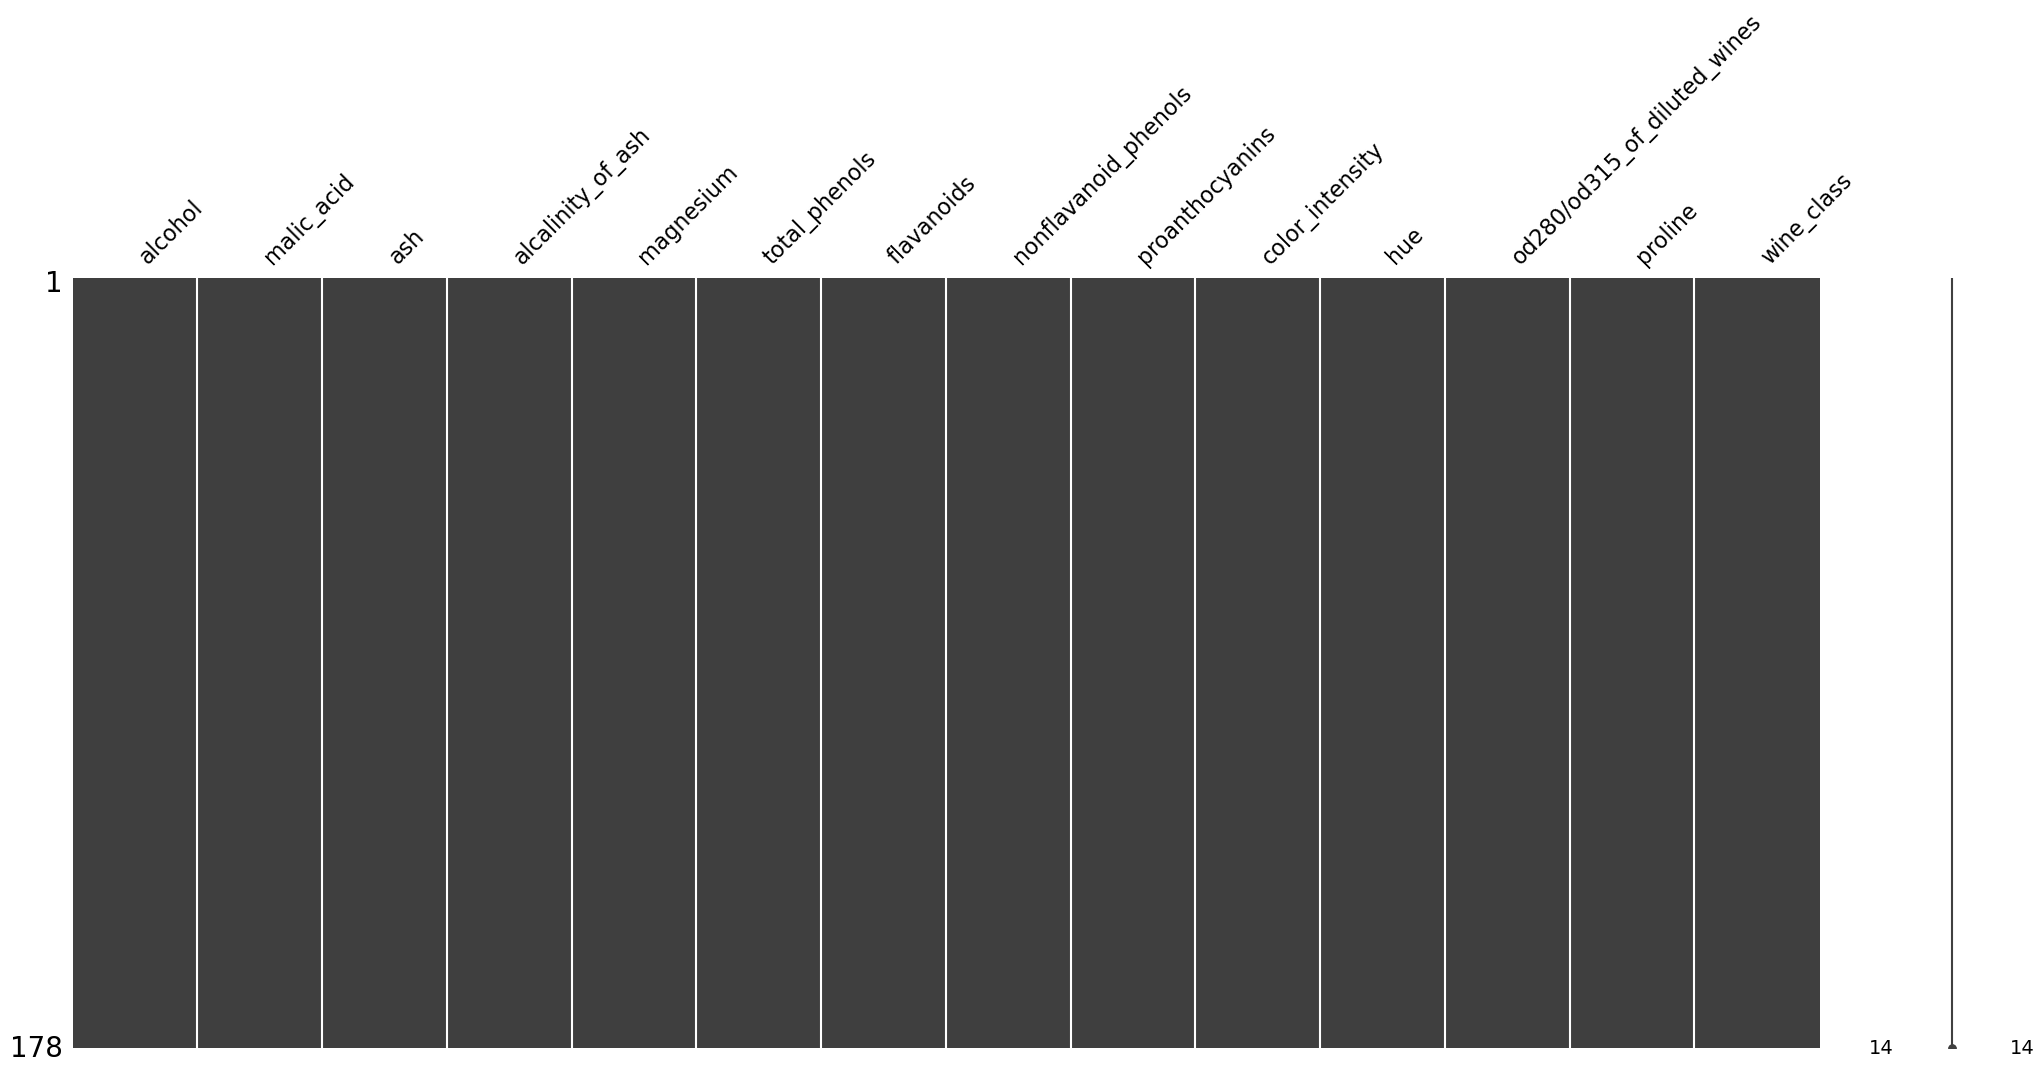

In [7]:
# Visualisation des valeurs manquantes
msno.matrix(df)

In [8]:
#nombre d'échantillons par classe
df["wine_class"].value_counts()

wine_class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Le dataset est propre et les classes sont un peu deséquilibrées. 
## Séparation train/ test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, #30% des données sont pour tester les modèle 
    random_state=42, #reproductibilité des résultats
    shuffle=True, # mélange les données avant séparation
    stratify=y #garantit les même proportions de classes dans train et test
)

## Modèle de classification 

In [11]:
def classification(X_train, X_test, y_train, y_test):
    """
    Fonction pour entraîner et évaluer plusieurs modèles de classification
    """
    #dictionnaire contenant les modeles 
    model = {'logistic_reg' : LogisticRegression(),
            'k_nearest' : KNeighborsClassifier(),
            'desicion_tree' : DecisionTreeClassifier(),
            'random_forest' : RandomForestClassifier()
            }

    for a, b in model.items(): 
        print(f'¤{a}') #afficher le nom du modèle
        b.fit(X_train, y_train) #compiler le modèle
        y_pred = b.predict(X_test) #prédiction

        #visualisation des métriques 
        print('\n RAPPORT DE CLASSIFICATION\n')
        print(classification_report(y_test, y_pred, target_names=target_names))
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names,
                    cbar_kws={'label': 'Nombre de prédictions'}, 
                    linewidths=2, linecolor='white')
        plt.title('Matrice de confusion', fontsize=14, fontweight='bold')
        plt.ylabel('Vraie classe', fontsize=12)
        plt.xlabel('Classe prédite', fontsize=12)
        plt.tight_layout()
        plt.show()

¤logistic_reg

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



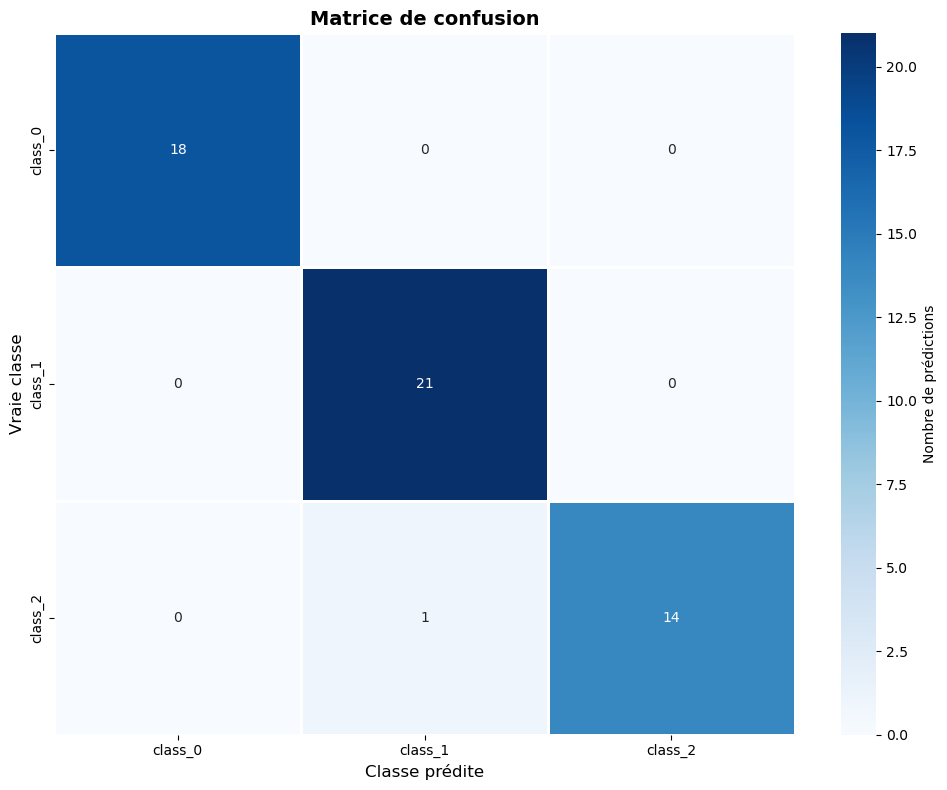

¤k_nearest

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



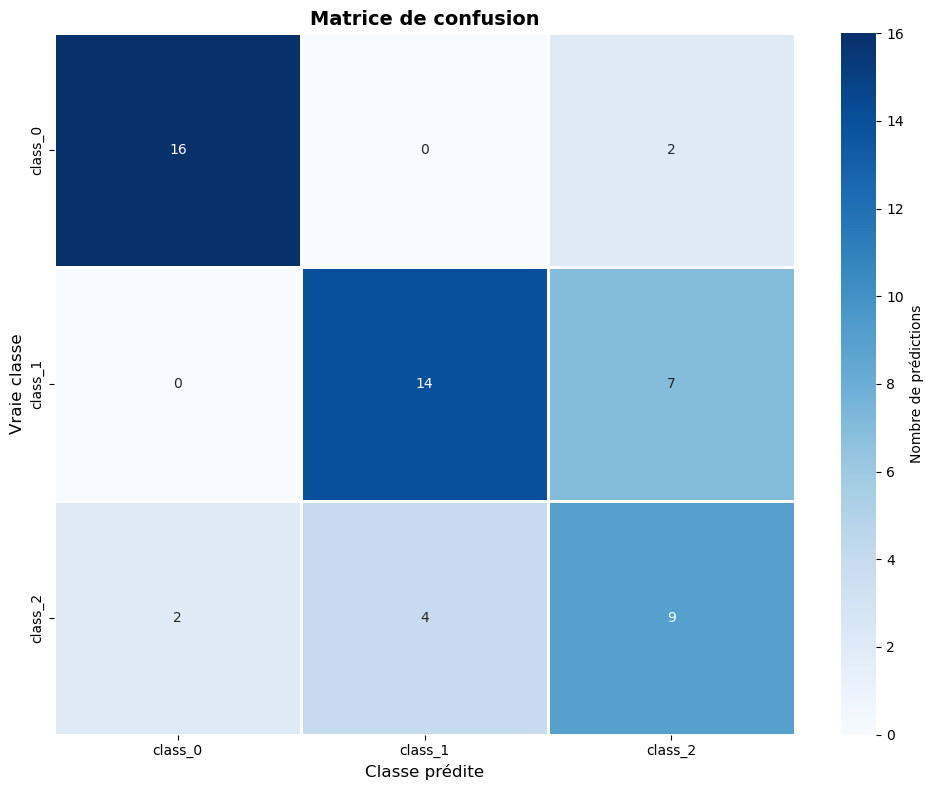

¤desicion_tree

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

     class_0       0.89      0.94      0.92        18
     class_1       0.90      0.90      0.90        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



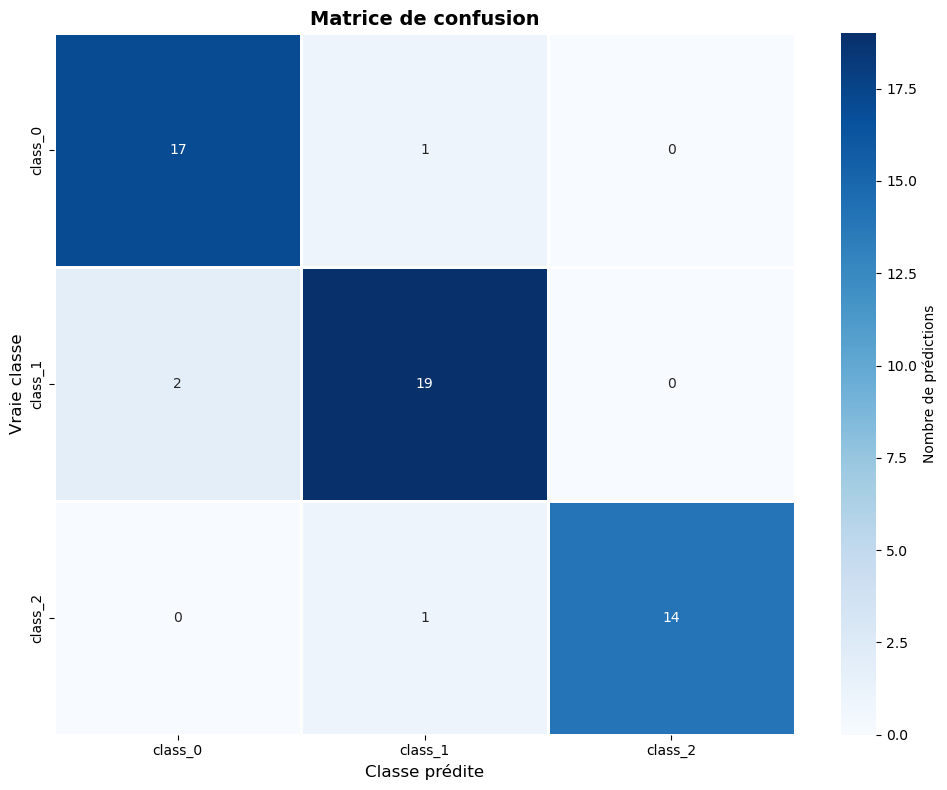

¤random_forest

 RAPPORT DE CLASSIFICATION

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



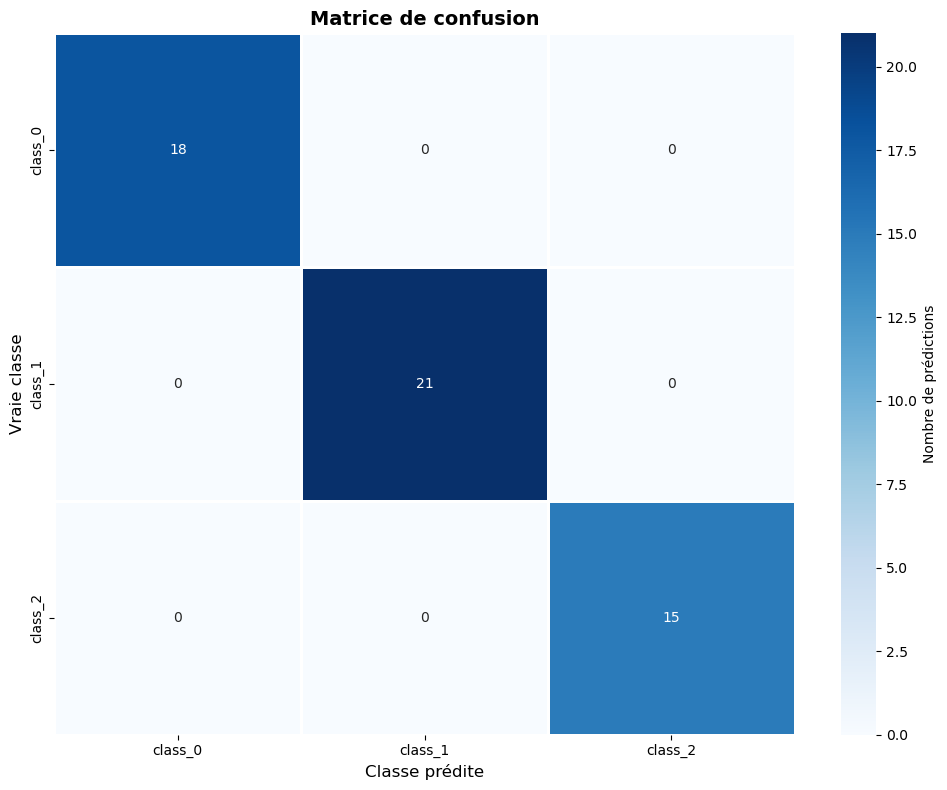

In [12]:
classification(X_train, X_test, y_train, y_test)

## Analyse des métriques d'évaluation 
### Logistic Regression
* score globaux très satisfaisant : 98% d'accuracy
* Le modèle a commis une seule erreur de prédiction : excellent résultat 
* Classe 0 parfaitement prédites; aucune erreur
* Le modèle a confondu une fois class_2, en détectant class_1 à la place
* Tout les class_1 sont correctement détecté
* Le modèle est globalement très bon.
### K neirest neigbhors 
* score globaux faible 0.72% d'accuracy
* class_0 est la classe la plus stable des trois (f1 score à 0.89 vs 0.72 et 0.55)
* le modèle se trompe une fois sur deux quand il détecte 'classe_2'
* modèle peu performant
### Desicion Tree 
* performance globales peu satisfaisantes 93% d'accuracy 
* Lorsque le modèle prédit class_2, il ne se trompe jamais (precision à 1)
* distingue bien class_0 et class_2, mais confusion entre class_0 et class_1 et entre class_1 et class_2
* résultat peu satisfaisant
### Random Forest 
* Performance parfaite: toutes les métriques à 1.
* Aucune erreur du modèle
### Conclusion 
Le modèle le plus adapté à cet